# QUESTION 3

**A. Using R, load the /public/bmort/R/wheat.csv data set into a data frame.
Are there any missing values? Perform any necessary data imputation on the data
set**

In [10]:
##Loading the dataset
wheat <- read.csv('/public/bmort/R/wheat.csv')
head(wheat,10)

area,perimeter,compactness,length,width,asymmetry,groove,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,A
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,A
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,A
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,A
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,A
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,A
14.69,14.49,0.8799,5.563,3.259,3.586,5.219,A
14.11,14.10,0.8911,5.420,NA,2.700,5.000,A
16.63,15.46,0.8747,6.053,3.465,2.040,5.877,A


In [11]:
dim(wheat)

[1] 200   8

In [12]:
## Locating the missing values  
which(is.na(wheat), arr.ind = TRUE)

row,col
8,5


From the output above, we can see that the missing value can be located at on the 8th row, 5th column.

In [13]:
### replacing the missing values in the width column with its column median
wheat$width[is.na(wheat$width)] <- median(wheat$width, na.rm = T)

In [14]:
head(wheat,10)

area,perimeter,compactness,length,width,asymmetry,groove,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,A
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,A
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,A
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,A
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,A
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,A
14.69,14.49,0.8799,5.563,3.259,3.586,5.219,A
14.11,14.10,0.8911,5.420,3.245,2.700,5.000,A
16.63,15.46,0.8747,6.053,3.465,2.040,5.877,A


**B. Produce a table of summary statistics on the data set. How do the ranges of the
values in the columns compare? Does each column of data have similar magnitudes
and ranges? Are there any outliers?**

In [15]:
## Summary table
summary(wheat)

      area         perimeter      compactness         length     
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:12.38   1st Qu.:13.47   1st Qu.:0.8583   1st Qu.:5.257  
 Median :14.40   Median :14.38   Median :0.8745   Median :5.534  
 Mean   :14.94   Mean   :14.60   Mean   :0.8721   Mean   :5.639  
 3rd Qu.:17.41   3rd Qu.:15.78   3rd Qu.:0.8879   3rd Qu.:6.009  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675  
     width         asymmetry          groove      type  
 Min.   :2.642   Min.   :0.7651   Min.   :4.519   A:68  
 1st Qu.:2.965   1st Qu.:2.4935   1st Qu.:5.043   B:69  
 Median :3.245   Median :3.5915   Median :5.226   C:63  
 Mean   :3.273   Mean   :3.6627   Mean   :5.414         
 3rd Qu.:3.564   3rd Qu.:4.7043   3rd Qu.:5.879         
 Max.   :4.033   Max.   :8.4560   Max.   :6.550         

compactness ranges from 0 to 1
Other explanatory variables have their respective ranges considering on their minimum and maximum values. For instance area can be said to be in the range (10, 22). perimeter(12,17),...


**C. Using the corrplot library's corrplot() function, generate a plot showing the correlations between the numerical data in the data set. Show the command used togenerate the plot and include the plot in your output.**

In [29]:
# Installing the corrplot  package
install.packages('corrplot')
library(corrplot)

In [17]:
wheat_num <- wheat[1:7]

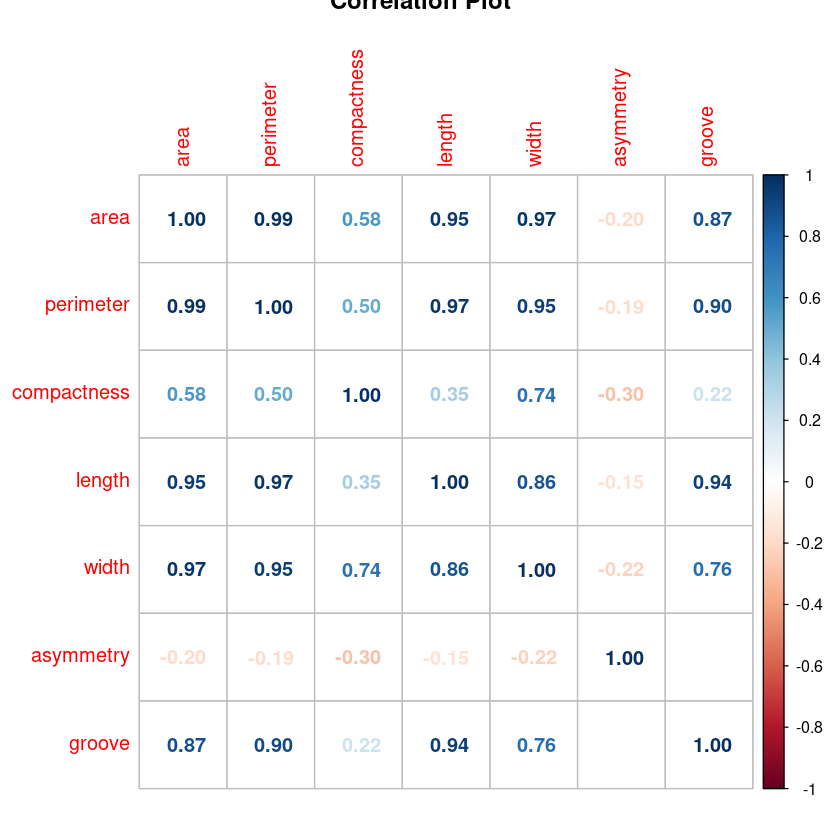

In [18]:
## A plot showing the correlation between the numeraical values
corrplot(cor(wheat_num),title = 'Correlation Plot', method = 'number')

In [19]:
cor(wheat_num)

,area,perimeter,compactness,length,width,asymmetry,groove
area,1.0000000,0.9943445,0.5842226,0.9523925,0.9710572,-0.1988635105,0.8724029594
perimeter,0.9943445,1.0000000,0.5036671,0.9740075,0.9453413,-0.1891508530,0.8977514250
compactness,0.5842226,0.5036671,1.0000000,0.3480583,0.7404249,-0.2973895580,0.2184362316
length,0.9523925,0.9740075,0.3480583,1.0000000,0.8649300,-0.1536175245,0.9351724535
width,0.9710572,0.9453413,0.7404249,0.8649300,1.0000000,-0.2228771417,0.7625547304
asymmetry,-0.1988635,-0.1891509,-0.2973896,-0.1536175,-0.2228771,1.0000000000,-0.0006429224
groove,0.8724030,0.8977514,0.2184362,0.9351725,0.7625547,-0.0006429224,1.0000000000


**D. Partition the beans data set so that 80% will be used for training and 20% will be used for testing your machine learning model. You can do the partition manually at random or use the createDataPartition() function in R's caret library. **

In [28]:
install.packages('caret')
install.packages('ggplot2')
install.packages('lattice')
library(caret)
library(ggplot2)
library(lattice)

In [21]:
## Partitioning the data set
split_data <- createDataPartition(wheat$type, p= 0.8, list = FALSE)
# print(split_data)

In [22]:
## The training and testing data
train_data <- wheat[split_data,]
test_data <- wheat[-split_data, ]

**E. Use the support vector machine (SVM) method with a linear basis function kernel from R's caret library to generate a machine learning model for the 7 types of wheat seeds based on some or all features provided in the data set. Using the caret library's trainControl() function, check your model parameter and feature selection by performing repeated cross-validation (with 5-folds)on the training data for your model. Consult the caret library documentation as needed.**

In [23]:
## setting up for cross validation
t_ctrl <- trainControl(method = 'repeatedcv', number = 5)

## setting up the model
svm_model <- train(type~., data = train_data, method = 'svmLinear', 
               trControl = t_ctrl, metric = 'Accuracy', preProcess= c('center', 'scale'))
svm_model

Support Vector Machines with Linear Kernel 

162 samples
  7 predictor
  3 classes: 'A', 'B', 'C' 

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (5 fold, repeated 1 times) 
Summary of sample sizes: 130, 130, 130, 129, 129 
Resampling results:

  Accuracy  Kappa    
  0.907197  0.8609243

Tuning parameter 'C' was held constant at a value of 1

**F. Use the test data set (i.e. the 20% of the data that was kept aside earlier) to generate a final validation for your model with the predict() function in the  caret library. Comment on the accuracy of the model.** 

In [24]:
## predicting the test data
pred_test <- predict(object = svm_model, newdata = test_data[1:7])
pred_test

[1] A B A A A A A A A A B A A B B B B B B B B B B B B B C C C C C C C A C C C C
Levels: A B C

In [25]:
confusionMatrix(table(pred_test, test_data$type))

Confusion Matrix and Statistics

         
pred_test  A  B  C
        A 11  0  1
        B  2 13  0
        C  0  0 11

Overall Statistics
                                          
               Accuracy : 0.9211          
                 95% CI : (0.7862, 0.9834)
    No Information Rate : 0.3421          
    P-Value [Acc > NIR] : 1.245e-13       
                                          
                  Kappa : 0.8814          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.8462   1.0000   0.9167
Specificity            0.9600   0.9200   1.0000
Pos Pred Value         0.9167   0.8667   1.0000
Neg Pred Value         0.9231   1.0000   0.9630
Prevalence             0.3421   0.3421   0.3158
Detection Rate         0.2895   0.3421   0.2895
Detection Prevalence   0.3158   0.3947   0.2895
Balanced Accuracy      0.9031   0.9600   0.9583

The accuracy of the SVM model for this wheat dataset is 92.11% 

**G. Based on your model, classify the beans provided in the unlabeled /public/bmort/R/wheat-unknown.csv data set. Indicate which classification of the 7 available types has been assigned to each of the unlabeled seeds.**

In [26]:
wheat_new <- read.csv('/public/bmort/R/wheat-unknown.csv')
wheat_new

area,perimeter,compactness,length,width,asymmetry,groove
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.56,13.31,0.8198,5.363,2.683,4.062,5.182
14.79,14.52,0.8819,5.545,3.291,2.704,5.111
10.82,12.83,0.8256,5.180,2.630,4.853,5.089
13.32,13.94,0.8613,5.541,3.073,7.035,5.440
11.49,13.22,0.8263,5.304,2.695,5.388,5.310
10.83,12.96,0.8099,5.278,2.641,5.182,5.185
15.11,14.54,0.8986,5.579,3.462,3.128,5.180
11.19,13.05,0.8253,5.250,2.675,5.813,5.219
12.02,13.33,0.8503,5.350,2.810,4.271,5.308


In [27]:
predict(svm_model, wheat_new)

[1] C A C C C C A C C B
Levels: A B C

The model predicts the above as the types of wheat for the new dataset given.